In [1]:
import pandas as pd

file_path = "C:/Users/shata/Downloads/foodtruckindiana1 - Sheet1.csv"
columns_to_read = list(range(13)) 

df = pd.read_csv(file_path, usecols=columns_to_read)
print(df.head())



                            NAME                ADDRESS  DINE-IN  TAKEOUT  \
0      big Jerry Indy food truck       8522 Madison Ave      NaN      NaN   
1           El Pastor Taco Truck                1053997      NaN      NaN   
2                Taco food truck      5621 N Parker Ave  Dine-in  Takeout   
3         Super Tacos food truck  7202 E Washington St   Dine-in  Takeout   
4  Mi Lindo Pénjamo - Food Truck      7910 Michigan Rd   Dine-in  Takeout   

              DELIVERY  DRIVE-THROUGH CURBSIDE-PICKUP           PHONE  \
0  No-contact delivery  Drive-through             NaN  (317) 331-9921   
1                  NaN            NaN             NaN             NaN   
2                  NaN            NaN             NaN  (317) 629-2332   
3                  NaN            NaN             NaN  (317) 490-2417   
4                  NaN            NaN             NaN  (317) 431-4439   

    CUISINE RATING  TIMING-START  TIME-END        CITIES  
0  American      5          11.0      1

Data: 82 Food Trucks from Indianapolis
6 from Bloomington, 5 from West Lafayette/Lafayette Area, 2 from Fort Wayne, 1 from Evansville, 4 from South Bend, 5 from Gary

Initial Data Exploration

In [2]:
total_rows = len(df)
dine_in_count = df['DINE-IN'].count()
percent_dinein = (dine_in_count/total_rows)*100
print(percent_dinein)

53.50877192982456


In [3]:
takeout = df['TAKEOUT'].count()
percent_takeout = (takeout/total_rows)*100
print(percent_takeout)

53.50877192982456


In [4]:
drive = df['DRIVE-THROUGH'].count()
percent_drive= (drive/total_rows)*100
print(percent_drive)

8.771929824561402


In [5]:
delivery = df['DELIVERY'].count()
percent_delivery = (delivery/total_rows)*100
print(percent_takeout)

53.50877192982456


In [6]:
curbside = df['CURBSIDE-PICKUP'].count()
percent_curbside = (curbside/total_rows)*100
print(percent_takeout)

53.50877192982456


In [7]:
mexican_count = (df['CUISINE'] == 'Mexican').sum()
total_count = len(df)
percentage_mexican = (mexican_count / total_count) * 100
print(percentage_mexican)

41.228070175438596


In [8]:
mexican_trucks = df[df['CUISINE'] == 'Mexican']
average_rating_mex = mexican_trucks['RATING'].astype(float).mean()
print("Average rating for Mexican food trucks:", average_rating_mex)

Average rating for Mexican food trucks: 4.3933333333333335


In [9]:
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')
average_rating = df['RATING'].mean()
print("Average rating for food trucks:", average_rating)

Average rating for food trucks: 4.491919191919192


In [10]:
unique_cuisines = df['CUISINE'].unique()

print("Unique cuisine values:")
for cuisine in unique_cuisines:
    print(cuisine)

Unique cuisine values:
American
Mexican
Mediterranean
-
Tex Mex
Asian
Venezuelan
Italian
Brazilian
African
Fusion
Dessert
Family 
nan
Pakistani
Sea Food
Barbeque
Greek
Thai
Mexican Fusion
Carribean
Serbian


C:\Users\shata\AppData\Local\Temp\ipykernel_23504\665586594.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuisine_data['RATING'] = pd.to_numeric(cuisine_data['RATING'], errors='coerce')


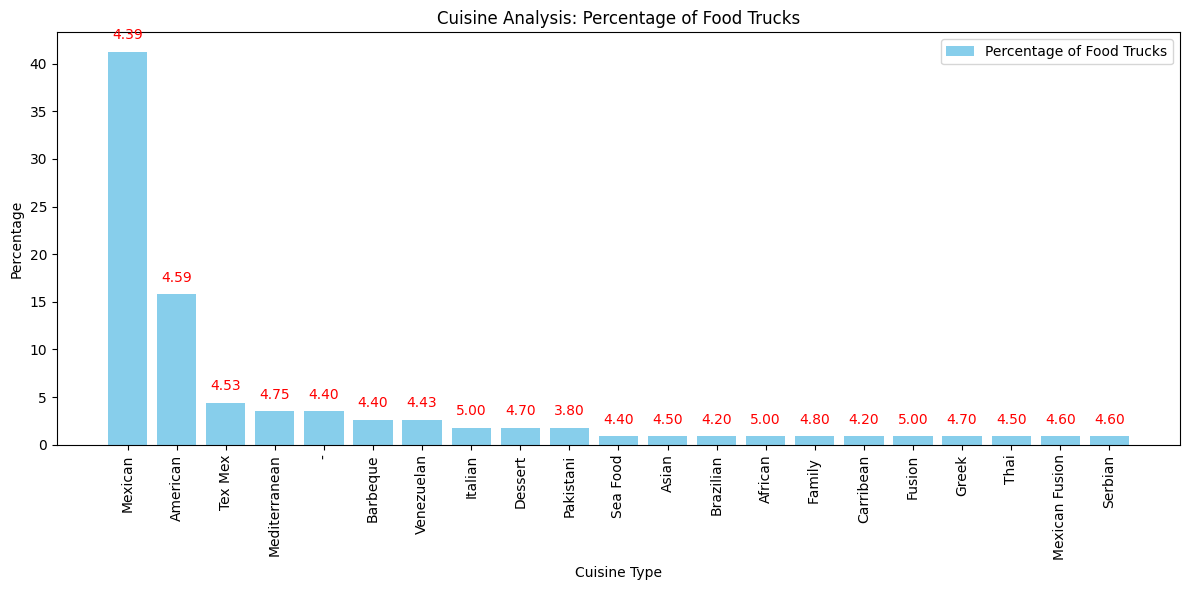

In [11]:
import matplotlib.pyplot as plt

# Calculate the percentage of each cuisine type
cuisine_counts = df['CUISINE'].value_counts()
total_food_trucks = len(df)
cuisine_percentages = (cuisine_counts / total_food_trucks) * 100

# Calculate the average rating for each cuisine
average_ratings = {}
for cuisine in cuisine_counts.index:
    cuisine_data = df[df['CUISINE'] == cuisine]
    cuisine_data['RATING'] = pd.to_numeric(cuisine_data['RATING'], errors='coerce')
    average_rating = cuisine_data['RATING'].mean()
    average_ratings[cuisine] = average_rating

# Sorting
sorted_cuisine_percentages = cuisine_percentages.sort_values(ascending=False)
sorted_average_ratings = [average_ratings[cuisine] for cuisine in sorted_cuisine_percentages.index]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_cuisine_percentages.index, sorted_cuisine_percentages, color='skyblue', label='Percentage of Food Trucks')
plt.xlabel('Cuisine Type')
plt.ylabel('Percentage')
plt.title('Cuisine Analysis: Percentage of Food Trucks')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


for i, rating in enumerate(sorted_average_ratings):
    plt.text(i, sorted_cuisine_percentages[i] + 1, f'{rating:.2f}', ha='center', va='bottom', fontsize=10, color='red')

plt.legend(['Percentage of Food Trucks', 'Average Rating'])

plt.tight_layout()


plt.show()


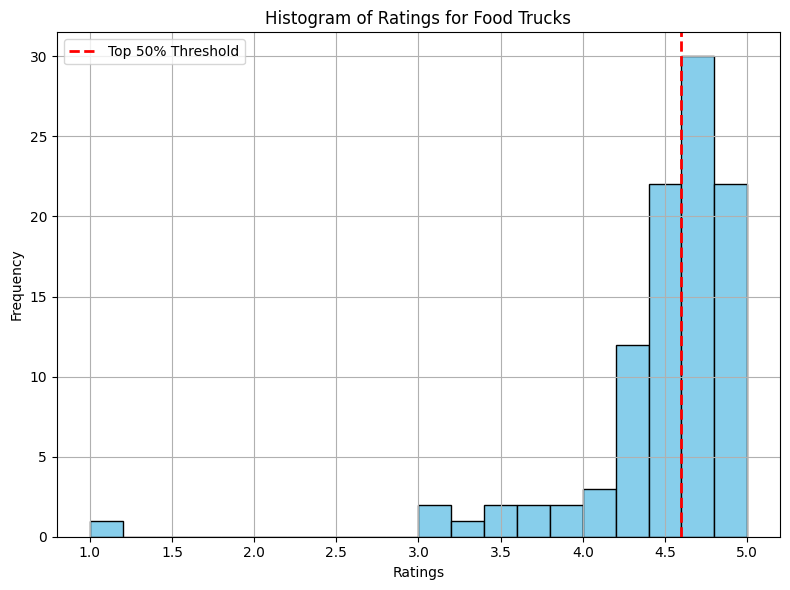

Top 50% Threshold: 4.60


In [12]:
import matplotlib.pyplot as plt
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

plt.figure(figsize=(8, 6))
plt.hist(df['RATING'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings for Food Trucks')
plt.grid(True)
top_50_threshold = df['RATING'].quantile(0.5)
plt.axvline(top_50_threshold, color='red', linestyle='dashed', linewidth=2, label='Top 50% Threshold')

plt.legend()
plt.tight_layout()
plt.show()

# Display the threshold for the top 50 percentile
print(f'Top 50% Threshold: {top_50_threshold:.2f}')


To access the top 50% of food trucks, a minimum rating of 4.6 is required.

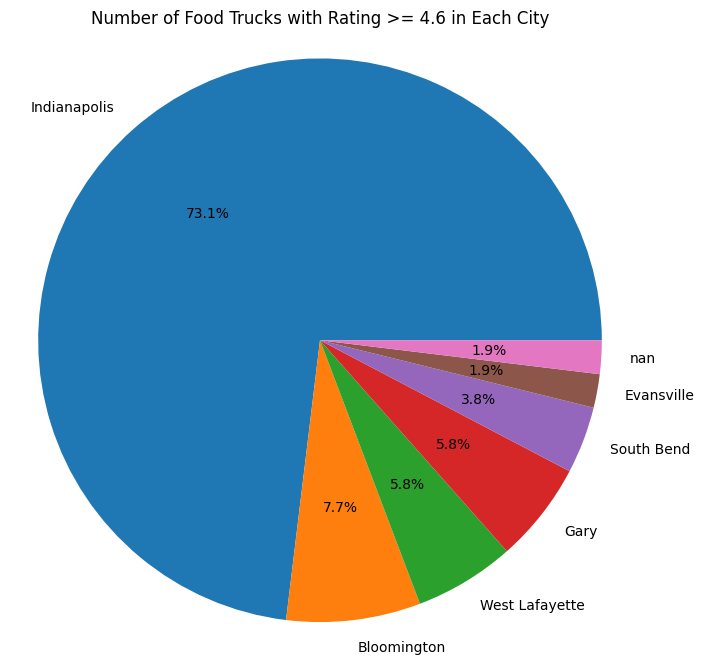

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df['CITIES'] = df['CITIES'].astype(str)
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

# Filter the data frame for food trucks with a rating greater than or equal to 4.6
filtered_df = df[df['RATING'] >= 4.6]
city_counts = filtered_df['CITIES'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Food Trucks']

# Create a pie chart for the number of food trucks in each city
plt.figure(figsize=(8, 8))
plt.pie(city_counts['Number of Food Trucks'], labels=city_counts['City'], autopct='%1.1f%%')
plt.title('Number of Food Trucks with Rating >= 4.6 in Each City')

plt.axis('equal')  
plt.show()


We can see that there are no Food Trucks witha rating higher than 4.6 in Fort Wayne, so we are not going there! And it looks like we are going to be spending a lot of time in Indy.

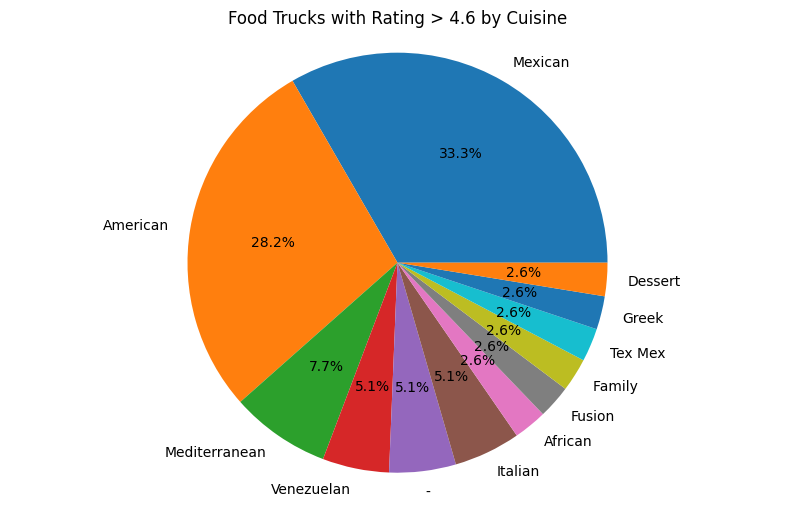

In [14]:
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

# Filter the data frame for food trucks with a rating higher than 4.6
high_rating_df = df[df['RATING'] > 4.6]

# Group the filtered data by 'CUISINE' and count the number of food trucks in each cuisine
cuisine_counts = high_rating_df['CUISINE'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%')
plt.title('Food Trucks with Rating > 4.6 by Cuisine')
plt.axis('equal')  

# Show the pie chart
plt.show()


Let's dedicate one day to Indianapolis, then travel to a city with Food Trucks that are open till late at night!

In [15]:
df['TIME-END'] = pd.to_numeric(df['TIME-END'], errors='coerce')

# Group the data by 'CITIES' and calculate the mean of 'TIME-END'
mean_end_time = df.groupby('CITIES')['TIME-END'].mean().reset_index()
mean_end_time.columns = ['City', 'Mean End Time']


print(mean_end_time)


             City  Mean End Time
0     Bloomington      19.750000
1      Evansville      20.000000
2      Fort Wayne      20.000000
3            Gary      18.500000
4    Indianapolis      17.580357
5      South Bend      22.000000
6  West Lafayette       6.300000
7             nan            NaN


It appears that the next destination will be West Lafayette. Given its average closing time of around 7 AM and its proximity to Purdue University, which has places open throughout the night and closing early in the morning, the drive is approximately 1 hour via I-65 North.

In [16]:
#PLANNING INDY TRAVEL PLAN


df['CITIES'] = df['CITIES'].astype(str)
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')
df['TIMING-START'] = pd.to_numeric(df['TIMING-START'], errors='coerce')

# Filter the data frame for food trucks in Indianapolis with a rating greater than or equal to 4.6, non-NaN start times, and start times between 10 and 18.5
filtered_df = df[(df['CITIES'] == 'Indianapolis') & (df['RATING'] >= 4.6) & (~df['TIMING-START'].isna()) & (df['TIMING-START'] >= 10) & (df['TIMING-START'] <= 18.5)]

selected_columns = ['NAME', 'CUISINE', 'RATING', 'TIMING-START']

indianapolis_high_rated_trucks = filtered_df[selected_columns].sort_values(by='TIMING-START', ascending=True)
print(indianapolis_high_rated_trucks)

                                    NAME        CUISINE  RATING  TIMING-START
77                                Subito            NaN     4.9          10.0
54            Taste of Liberia Foodtruck        African     5.0          10.0
49  King Gyro Food Truck- Emerson Avenue       American     5.0          10.0
37                           Super Tacos        Mexican     4.6          10.0
61                               ChefTLC       American     4.8          11.0
51                           Tacos Maela        Mexican     4.7          11.0
76                  Yanni's Golden Gyros          Greek     4.7          11.0
0              big Jerry Indy food truck       American     5.0          11.0
32           ClusterTruck - Broad Ripple  Mediterranean     4.8          11.0
34      Tacos Tierra caliente Restaurant        Mexican     4.8          11.0
67                        Dakomfort Zone        Tex Mex     5.0          12.0
15              El Buenavista Food Truck        Mexican     5.0 

Taste of Liberia Foodtruck

Tacos Maela

big jerry indy food truck

Dakomfort Zone

Tacos El Iturbidense

These are the Food Truck we will visit, based on their overall rating and trying cuisines.


In [17]:
import pandas as pd

restaurant_names = [
    'Taste of Liberia Foodtruck',
    'Tacos Maela',
    'big Jerry Indy food truck',
    'Dakomfort Zone',
    'Taquería el primo'
]

filtered_df = df[df['NAME'].str.strip().isin(restaurant_names)]

selected_columns = ['NAME', 'TIMING-START', 'TIME-END', 'ADDRESS']
specified_restaurants = filtered_df[selected_columns]

print(specified_restaurants)


                          NAME  TIMING-START  TIME-END              ADDRESS
0    big Jerry Indy food truck          11.0      19.5     8522 Madison Ave
51                 Tacos Maela          11.0      20.5  3440 Shadeland Ave 
54  Taste of Liberia Foodtruck          10.0      20.0    Indianapolis, IN 
67              Dakomfort Zone          12.0      21.0      3702 W 16th St 
70           Taquería el primo          14.5       2.5   2402 Lafayette Rd 


Finding the optimum route to visit these 5 places

In [18]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic


addresses = [
    '8522 Madison Ave, Indianapolis, IN',
    '3440 Shadeland Ave, Indianapolis, IN',
    '9211 Lansburgh Circle, Indianapolis, IN',
    '3702 W 16th St, Indianapolis, IN',
    '2402 Lafayette Rd, Indianapolis, IN'
]

# Geocoding using Nominatim
geolocator = Nominatim(user_agent="restaurant_route_planner")
locations = [geolocator.geocode(address) for address in addresses]

# Create a distance matrix
distances = []

for i in range(len(locations)):
    row = []
    for j in range(len(locations)):
        if i == j:
            row.append(0)  # Distance from a location to itself is 0
        else:
            distance = geodesic(
                (locations[i].latitude, locations[i].longitude),
                (locations[j].latitude, locations[j].longitude)
            ).miles
            row.append(distance)
    distances.append(row)

# Print the distance matrix
for i in range(len(addresses)):
    for j in range(len(addresses)):
        print(f"Distance between {addresses[i]} and {addresses[j]}: {distances[i][j]:.2f} miles")


Distance between 8522 Madison Ave, Indianapolis, IN and 8522 Madison Ave, Indianapolis, IN: 0.00 miles
Distance between 8522 Madison Ave, Indianapolis, IN and 3440 Shadeland Ave, Indianapolis, IN: 12.81 miles
Distance between 8522 Madison Ave, Indianapolis, IN and 9211 Lansburgh Circle, Indianapolis, IN: 16.43 miles
Distance between 8522 Madison Ave, Indianapolis, IN and 3702 W 16th St, Indianapolis, IN: 11.43 miles
Distance between 8522 Madison Ave, Indianapolis, IN and 2402 Lafayette Rd, Indianapolis, IN: 11.97 miles
Distance between 3440 Shadeland Ave, Indianapolis, IN and 8522 Madison Ave, Indianapolis, IN: 12.81 miles
Distance between 3440 Shadeland Ave, Indianapolis, IN and 3440 Shadeland Ave, Indianapolis, IN: 0.00 miles
Distance between 3440 Shadeland Ave, Indianapolis, IN and 9211 Lansburgh Circle, Indianapolis, IN: 14.85 miles
Distance between 3440 Shadeland Ave, Indianapolis, IN and 3702 W 16th St, Indianapolis, IN: 9.70 miles
Distance between 3440 Shadeland Ave, Indianapoli

In [19]:
def nearest_neighbor(distances):
    num_locations = len(distances)
    unvisited = list(range(num_locations))
    route = [unvisited.pop(0)]  
    while unvisited:
        current_location = route[-1]
        nearest, nearest_distance = None, float('inf')

        for neighbor in unvisited:
            distance = distances[current_location][neighbor]
            if distance < nearest_distance:
                nearest, nearest_distance = neighbor, distance

        route.append(nearest)
        unvisited.remove(nearest)

    return route


distances = [
    [0.00, 12.81, 8.89, 11.43, 11.97],
    [12.81, 0.00, 6.94, 9.70, 8.96],
    [8.89, 6.94, 0.00, 3.73, 3.66],
    [11.43, 9.70, 3.73, 0.00, 1.07],
    [11.97, 8.96, 3.66, 1.07, 0.00]
]

addresses = [
    "8522 Madison Ave, Indianapolis, IN",
    "3440 Shadeland Ave, Indianapolis, IN",
    "9211 Lansburgh Circle, Indianapolis, IN",
    "3702 W 16th St, Indianapolis, IN",
    "2402 Lafayette Rd, Indianapolis, IN"
]

# Find the optimal route using the nearest neighbor algorithm
optimal_route = nearest_neighbor(distances)

# Print the optimal route
for i, location in enumerate(optimal_route):
    print(f"Visit food truck {i + 1}: {addresses[location]}")


Visit food truck 1: 8522 Madison Ave, Indianapolis, IN
Visit food truck 2: 9211 Lansburgh Circle, Indianapolis, IN
Visit food truck 3: 2402 Lafayette Rd, Indianapolis, IN
Visit food truck 4: 3702 W 16th St, Indianapolis, IN
Visit food truck 5: 3440 Shadeland Ave, Indianapolis, IN


Planning West-Lafayette (Reach around 9 to 10 PM)

In [20]:
west_lafayette_filtered_df = df[(df['CITIES'] == 'West Lafayette') & (df['RATING'] >= 4.6)]

selected_columns = ['NAME', 'CUISINE', 'RATING', 'TIMING-START', 'TIME-END']

west_lafayette_high_rated_trucks = west_lafayette_filtered_df[selected_columns].sort_values(by='TIMING-START', ascending=True)

# Print the table
print(west_lafayette_high_rated_trucks)


                         NAME         CUISINE  RATING  TIMING-START  TIME-END
87          Tortas Food Truck         Mexican     4.8          10.0      20.0
88  Tacos Mexico Food Truck\r         Mexican     4.6          19.0       3.0
90             Famous Frank's  Mexican Fusion     4.6          23.0       3.5


Since we only have two available spots, the order is not important. We cannot visit Tortas Food Truck due to its timing.

In [21]:
# Group the data frame by 'CITIES' and calculate the mean of 'TIMING-START'
city_mean_start_times = df.groupby('CITIES')['TIMING-START'].mean()

# Print the result
print(city_mean_start_times)

CITIES
Bloomington       10.875000
Evansville        16.500000
Fort Wayne        11.000000
Gary              10.250000
Indianapolis      12.919643
South Bend        11.875000
West Lafayette    16.000000
nan                     NaN
Name: TIMING-START, dtype: float64


Bloomington, Gary, and South Bend have competitive start timings(mean), while Fort Wayne is not considered since it lacks food trucks with a rating greater than 4.6.

In [22]:
import pandas as pd

# Assuming your data frame is named 'df'
df['CITIES'] = df['CITIES'].astype(str)
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

# Filter the data frame for food trucks with a rating greater than or equal to 4.6 in the specified cities
selected_cities = ['South Bend', 'Gary', 'Bloomington']
filtered_df = df[(df['CITIES'].isin(selected_cities)) & (df['RATING'] >= 4.6)]

# Group the filtered data by 'CITIES' and count the number of food trucks
city_counts = filtered_df['CITIES'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Food Trucks with Rating >= 4.6']

# Print the table
print(city_counts)


          City  Number of Food Trucks with Rating >= 4.6
0  Bloomington                                         4
1         Gary                                         3
2   South Bend                                         2


The travel times from West Lafayette to these places are as follows:

Bloomington: Approximately 2 hours (traveling in the opposite direction, towards Indianapolis, which may not be the most efficient route).

Gary: Approximately 1.5 hours (traveling north, which makes it easier to continue on to South Bend).
Your next stop is Gary, Indiana.

In [23]:
# Assuming your data frame is named 'df'
file_path = "C:/Users/shata/Downloads/foodtruckindiana1 - Sheet1.csv"
columns_to_read = list(range(13)) 

df = pd.read_csv(file_path, usecols=columns_to_read)
df['CITIES'] = df['CITIES'].astype(str)
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

# Filter the data frame for food trucks in Gary with a rating greater than 4.6
filtered_gary_trucks = df[(df['CITIES'] == 'Gary') & (df['RATING'] >= 4.6)]

# Extract the list of food trucks with their names and ratings
gary_high_rated_trucks = filtered_gary_trucks[['NAME', 'RATING']]

# Convert the result to a list
gary_high_rated_trucks_list = gary_high_rated_trucks.values.tolist()

# Print the list
for truck in gary_high_rated_trucks_list:
    print(truck)


['Balkan Grill Company', 4.6]
["Chela's", 4.6]
['Sea Dogs Hot Dogs & Pizza\r', 5.0]


In [24]:
gary_restaurants = df[(df['CITIES'] == 'Gary') & (df['RATING'] >= 4.6)]
selected_columns = ['NAME', 'ADDRESS', 'CUISINE', 'RATING','TIMING-START', 'TIME-END']

# Print the table
print(gary_restaurants[selected_columns])

                            NAME                            ADDRESS   CUISINE  \
99          Balkan Grill Company      3101 Grant St, Gary, IN 46408   Serbian   
100                      Chela's      5115 Broadway, Gary, IN 46409   Mexican   
102  Sea Dogs Hot Dogs & Pizza\r  705-899 N Lake St, Gary, IN 46403  American   

     RATING  TIMING-START  TIME-END  
99      4.6          10.0      17.0  
100     4.6          10.0      21.0  
102     5.0          11.0      19.0  


The food truck start timings are at 10 AM and 11 AM.

In [25]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

# Example addresses
addresses = [
    '3101 Grant St, Gary, IN 46408',
    '5115 Broadway, Gary, IN 46409',
    '705 N Lake St, Gary, IN 46403'
]

# Geocoding using Nominatim
geolocator = Nominatim(user_agent="restaurant_route_planner")
locations = []

for address in addresses:
    location = geolocator.geocode(address)
    if location:
        locations.append(location)
    else:
        print(f"Geocoding failed for address: {address}")

# Create a distance matrix
distances = []

for i in range(len(locations)):
    row = []
    for j in range(len(locations)):
        if i == j:
            row.append(0)  # Distance from a location to itself is 0
        else:
            distance = geodesic(
                (locations[i].latitude, locations[i].longitude),
                (locations[j].latitude, locations[j].longitude)
            ).miles
            row.append(distance)
    distances.append(row)

# Print the distance matrix
for i in range(len(addresses)):
    for j in range(len(addresses)):
        print(f"Distance between {addresses[i]} and {addresses[j]}: {distances[i][j]:.2f} miles")


Distance between 3101 Grant St, Gary, IN 46408 and 3101 Grant St, Gary, IN 46408: 0.00 miles
Distance between 3101 Grant St, Gary, IN 46408 and 5115 Broadway, Gary, IN 46409: 2.79 miles
Distance between 3101 Grant St, Gary, IN 46408 and 705 N Lake St, Gary, IN 46403: 5.85 miles
Distance between 5115 Broadway, Gary, IN 46409 and 3101 Grant St, Gary, IN 46408: 2.79 miles
Distance between 5115 Broadway, Gary, IN 46409 and 5115 Broadway, Gary, IN 46409: 0.00 miles
Distance between 5115 Broadway, Gary, IN 46409 and 705 N Lake St, Gary, IN 46403: 7.22 miles
Distance between 705 N Lake St, Gary, IN 46403 and 3101 Grant St, Gary, IN 46408: 5.85 miles
Distance between 705 N Lake St, Gary, IN 46403 and 5115 Broadway, Gary, IN 46409: 7.22 miles
Distance between 705 N Lake St, Gary, IN 46403 and 705 N Lake St, Gary, IN 46403: 0.00 miles


In [26]:
# Provided distance values for Gary addresses
gary_distances = [
    [0.00, 2.79, 5.85],
    [2.79, 0.00, 7.22],
    [5.85, 7.22, 0.00]
]

gary_addresses = [
    '3101 Grant St, Gary, IN 46408',
    '5115 Broadway, Gary, IN 46409',
    '705 N Lake St, Gary, IN 46403'
]

def nearest_neighbor(distances, addresses):
    num_locations = len(distances)
    unvisited = list(range(num_locations))
    route = [unvisited.pop(0)]  # Start from the first location

    while unvisited:
        current_location = route[-1]
        nearest, nearest_distance = None, float('inf')

        for neighbor in unvisited:
            distance = distances[current_location][neighbor]
            if distance < nearest_distance:
                nearest, nearest_distance = neighbor, distance

        route.append(nearest)
        unvisited.remove(nearest)

    return route

# Find the optimal route for Gary addresses using the nearest neighbor algorithm
optimal_route_gary = nearest_neighbor(gary_distances, gary_addresses)

# Print the optimal route for Gary addresses
for i, location in enumerate(optimal_route_gary):
    print(f"Visit food truck {i + 1}: {gary_addresses[location]}")


Visit food truck 1: 3101 Grant St, Gary, IN 46408
Visit food truck 2: 5115 Broadway, Gary, IN 46409
Visit food truck 3: 705 N Lake St, Gary, IN 46403


Next, travel to South Bend will take approximately 1 hour.

In [27]:
import pandas as pd

df['CITIES'] = df['CITIES'].astype(str)
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')
df['TIMING-START'] = pd.to_numeric(df['TIMING-START'], errors='coerce')

filtered_df = df[(df['CITIES'] == 'South Bend') & (df['RATING'] >= 4.6)]

# Select relevant columns
selected_columns = ['NAME', 'CUISINE', 'RATING', 'TIMING-START', 'TIME-END', 'ADDRESS']


south_bend_high_rated_restaurants = filtered_df[selected_columns]
print(south_bend_high_rated_restaurants)


                                   NAME   CUISINE  RATING  TIMING-START  \
97  Ice Cream On Wheels of South Bend\r   Dessert     5.0           0.0   
98    Wiener Shack & Grill Food Truck\r  American     4.8          16.5   

    TIME-END                                ADDRESS  
97      24.0    56565 Pine Rd, South Bend, IN 46619  
98      21.0  11665 McKinley Hwy, Osceola, IN 46561  


Since there are only two food trucks available, the order of visiting them does not matter.